In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
df = pd.read_csv('ratings.csv')

df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [35]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [36]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

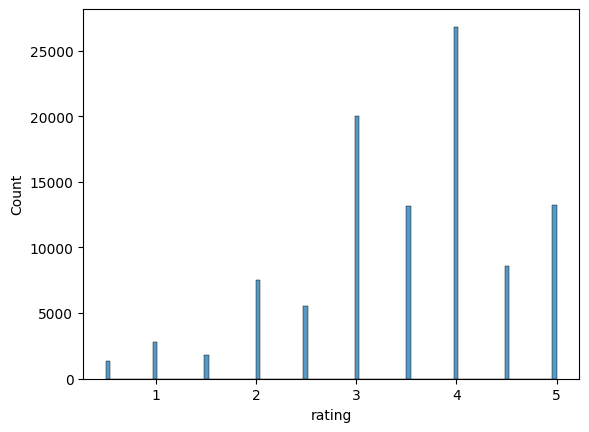

In [37]:
sns.histplot(df['rating'])
plt.show()

# Some Takeaways 

- The timestamp column  is not needed

In [40]:
df = df.drop('timestamp', axis=1)

df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [42]:


# Create a pivot table with rows as users, columns as movies, and values as ratings
pivot_table = df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Display the transformed data
print(pivot_table)


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0       0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     0.0     0.0     0.0     0.0     0.0     2.5       0   
607         4.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
608         2.5     2.0     2.0     0.0     0.0     0.0     0.0       0   
609         3.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
610         5.0     0.0     0.0     0.0     0.0     5.0     0.0       0   

movieId  9       10     

In [62]:
from sklearn.cluster import KMeans

X = pivot_table.to_numpy()

In [63]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

KMeans(n_clusters=3)

In [64]:
cluster_labels = kmeans.predict(X)

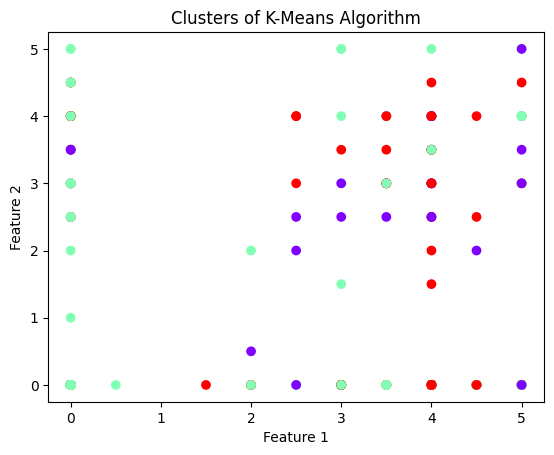

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters of K-Means Algorithm')
plt.show()

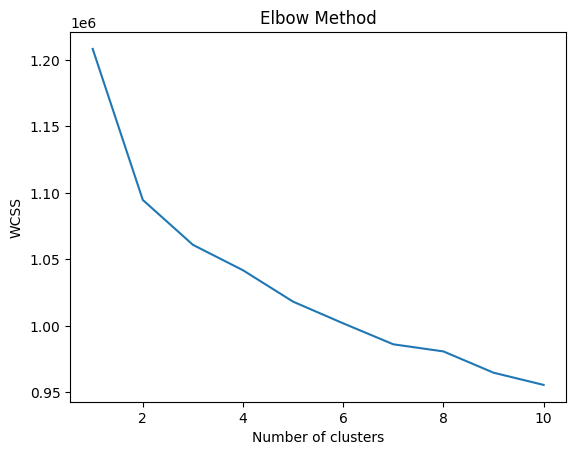

In [66]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
final_model = KMeans(n_clusters=2)

final_model.fit(X) 

KMeans(n_clusters=2)

In [83]:
cluster_labels = final_model.fit_predict(X)

In [84]:
import numpy as np 

def movie_recommendations(user_id, num_recommendations, pivot_table, cluster_labels):
    # Find the cluster to which the user belongs
    user_cluster = cluster_labels[user_id - 1]  # Adjust the index as user IDs are 1-indexed in the DataFrame

    # Get the ratings of the user
    user_ratings = pivot_table.iloc[user_id - 1]

    # Get the movie IDs that the user has already rated
    rated_movies = user_ratings[user_ratings > 0].index

    # Get the indices of the movies in the user's cluster
    cluster_indices = np.where(cluster_labels == user_cluster)[0]

    # Get the average ratings of the movies in the user's cluster
    cluster_avg_ratings = X[cluster_indices].mean(axis=0)

    # Sort the movies in the user's cluster based on average ratings (highest first)
    sorted_movies = np.argsort(cluster_avg_ratings)[::-1]

    # Remove the movies that the user has already rated
    recommended_movies = [movie_id for movie_id in sorted_movies if movie_id not in rated_movies]

    # Get the top N movie recommendations
    top_recommendations = recommended_movies[:num_recommendations]

    return top_recommendations

# Example usage:
user_id = 1
num_recommendations = 5
recommendations = movie_recommendations(user_id, num_recommendations, pivot_table, cluster_labels)
print(f"Top {num_recommendations} movie recommendations for User {user_id}: {recommendations}")


Top 5 movie recommendations for User 1: [1938, 224, 257, 314, 897]
